In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder as le

%matplotlib inline

In [6]:
df = pd.read_csv('/content/first inten project.csv')

In [8]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Booking_ID                36285 non-null  object 
 1   number of adults          36285 non-null  int64  
 2   number of children        36285 non-null  int64  
 3   number of weekend nights  36285 non-null  int64  
 4   number of week nights     36285 non-null  int64  
 5   type of meal              36285 non-null  object 
 6   car parking space         36285 non-null  int64  
 7   room type                 36285 non-null  object 
 8   lead time                 36285 non-null  int64  
 9   market segment type       36285 non-null  object 
 10  repeated                  36285 non-null  int64  
 11  P-C                       36285 non-null  int64  
 12  P-not-C                   36285 non-null  int64  
 13  average price             36285 non-null  float64
 14  specia

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled


In [10]:
df.isnull().sum()

,0
Booking_ID,0
number of adults,0
number of children,0
number of weekend nights,0
number of week nights,0
type of meal,0
car parking space,0
room type,0
lead time,0
market segment type,0


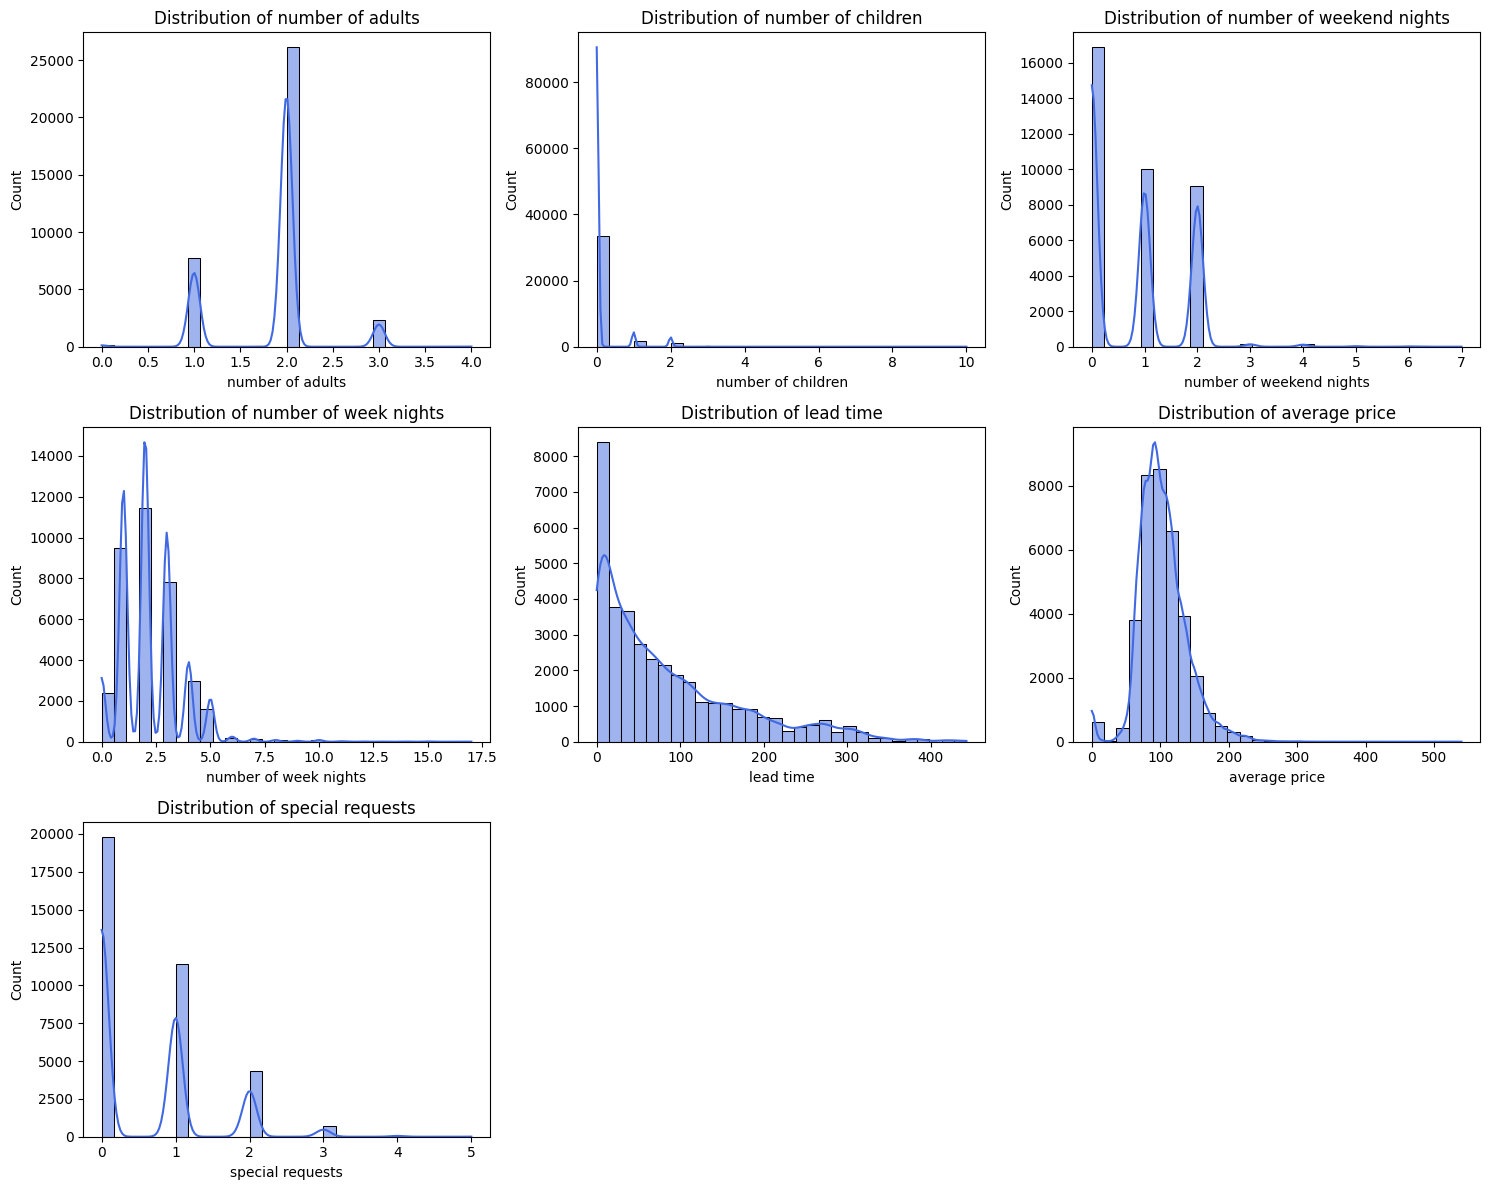

In [11]:
df.columns = df.columns.str.strip()

# Re-attempt plotting distribution of numerical features
numerical_columns = [
    "number of adults", "number of children", "number of weekend nights",
    "number of week nights", "lead time", "average price", "special requests"
]

plt.figure(figsize=(15, 12))

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], bins=30, kde=True, color="royalblue")
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()


* This graph means that most bookings happen close to the check-in date.   
* Number of adults and number of children mostly center around common values like 1 or 2.
*   Number of weekend and week nights show clear peaks, likely indicating common booking patterns.
*   Average price varies significantly, with a peak at lower price ranges.





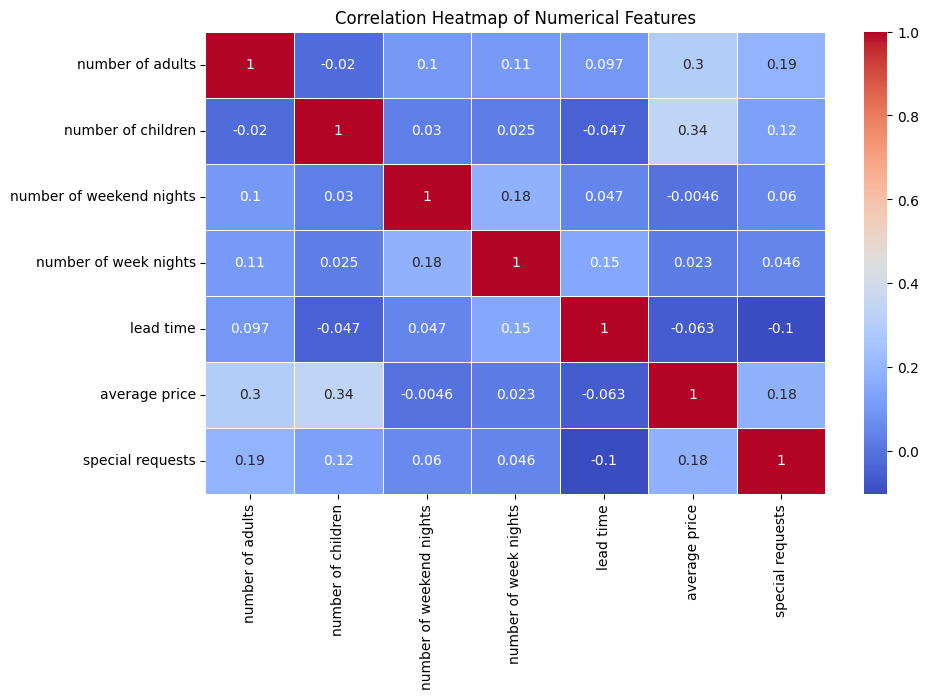

In [12]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[numerical_columns].corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


* Lead time has a slight negative correlation with average price, meaning longer lead times might be associated with lower prices.
* Number of week nights and number of weekend nights are positively correlated
* Special requests don’t have a strong correlation with most numerical features, meaning that they are independent of factors like lead time or price


<ipython-input-13-8628c0fe1a00>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="booking status", data=df, palette="pastel")


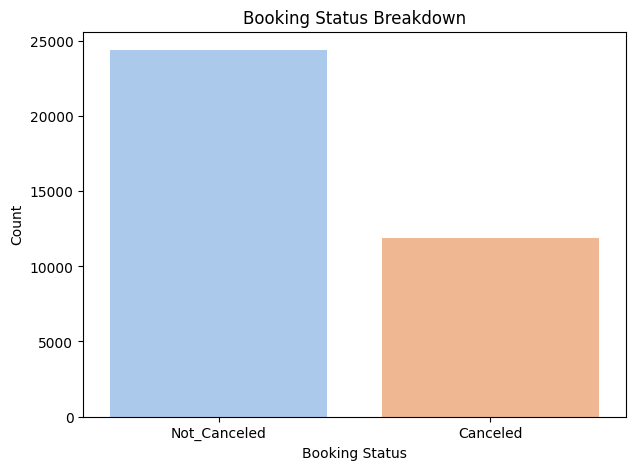

In [13]:
plt.figure(figsize=(7, 5))
sns.countplot(x="booking status", data=df, palette="pastel")
plt.title("Booking Status Breakdown")
plt.xlabel("Booking Status")
plt.ylabel("Count")
plt.show()

<ipython-input-14-6e1d208075ed>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="market segment type", data=df, palette="viridis", order=df["market segment type"].value_counts().index)


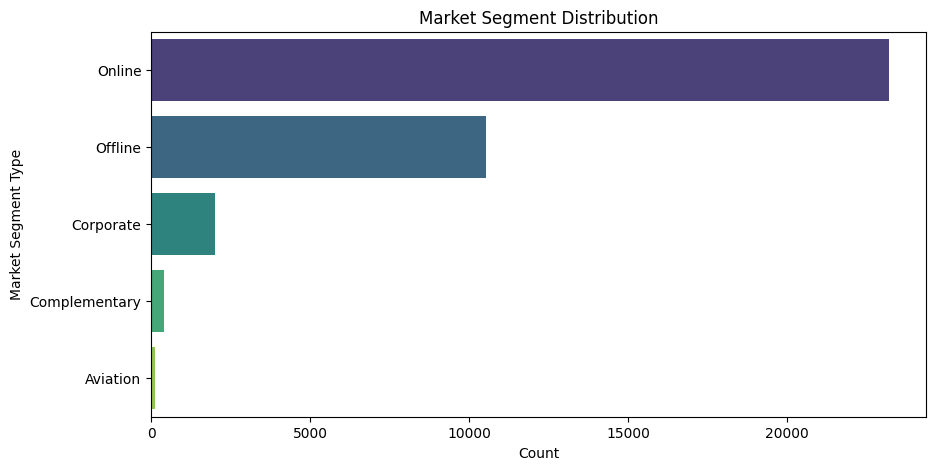

In [14]:
plt.figure(figsize=(10, 5))
sns.countplot(y="market segment type", data=df, palette="viridis", order=df["market segment type"].value_counts().index)
plt.title("Market Segment Distribution")
plt.xlabel("Count")
plt.ylabel("Market Segment Type")
plt.show()


*   The market segment distribution shows which sources contribute most to hotel bookings.




<ipython-input-15-f6ee45d29fec>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="booking status", y="lead time", data=df, palette="coolwarm")


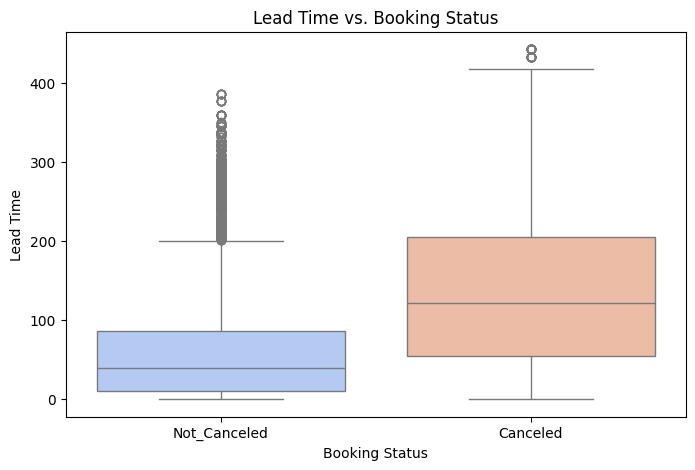

In [15]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="booking status", y="lead time", data=df, palette="coolwarm")
plt.title("Lead Time vs. Booking Status")
plt.xlabel("Booking Status")
plt.ylabel("Lead Time")
plt.show()


* The boxplot shows that canceled bookings tend to have longer lead times compared to non-canceled ones which  suggests that reservations made far in advance might have a higher chance of cancellation.



<ipython-input-16-0c59355c0461>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="special requests", data=df, palette="magma")


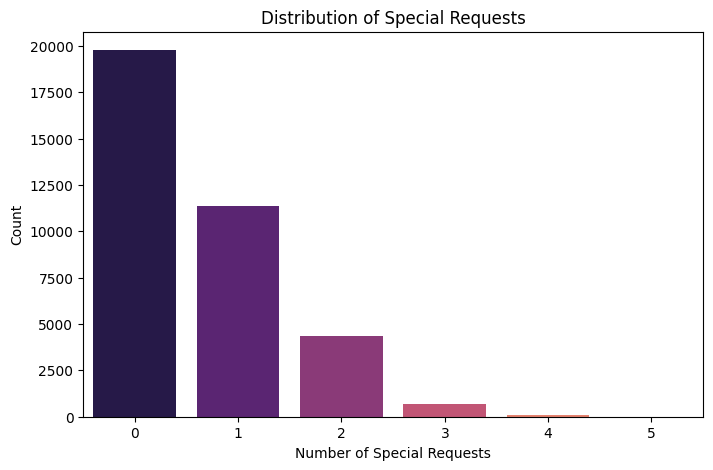

In [16]:
plt.figure(figsize=(8, 5))
sns.countplot(x="special requests", data=df, palette="magma")
plt.title("Distribution of Special Requests")
plt.xlabel("Number of Special Requests")
plt.ylabel("Count")
plt.show()

* The special requests distribution shows that most guests either make no special requests or just a few.
* A smaller group makes multiple requests, which could indicate guests with specific needs or preferences.

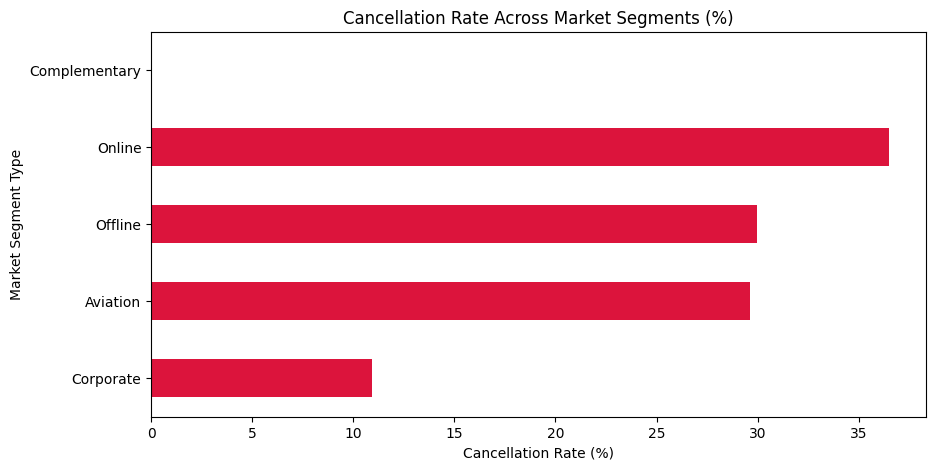

In [17]:
cancellation_rate_market = df.groupby("market segment type")["booking status"].value_counts(normalize=True).unstack()["Canceled"] * 100

plt.figure(figsize=(10, 5))
cancellation_rate_market.sort_values().plot(kind="barh", color="crimson")
plt.title("Cancellation Rate Across Market Segments (%)")
plt.xlabel("Cancellation Rate (%)")
plt.ylabel("Market Segment Type")
plt.show()

* The cancellation rate across market segments reveals which segments have the highest likelihood of cancellations. Online bookings might have higher cancellations compared to offline bookings or corporate reservations.

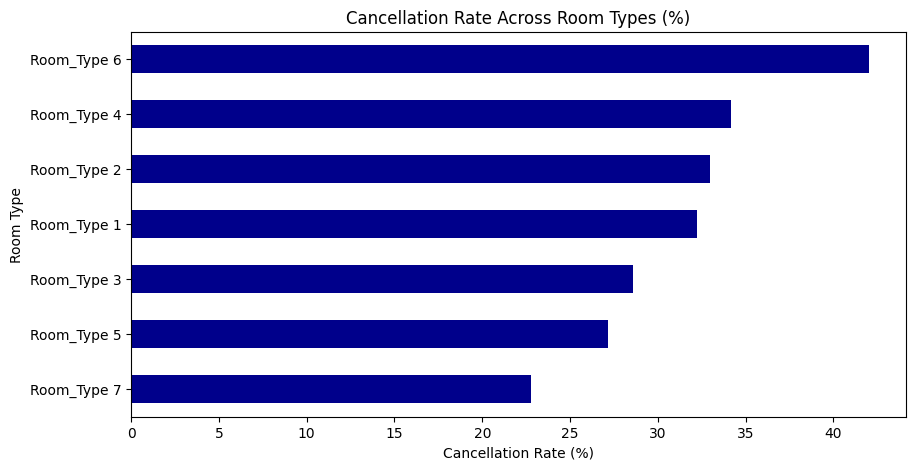

In [18]:

cancellation_rate_room = df.groupby("room type")["booking status"].value_counts(normalize=True).unstack()["Canceled"] * 100


plt.figure(figsize=(10, 5))
cancellation_rate_room.sort_values().plot(kind="barh", color="darkblue")
plt.title("Cancellation Rate Across Room Types (%)")
plt.xlabel("Cancellation Rate (%)")
plt.ylabel("Room Type")
plt.show()


* The cancellation rate across room types shows which room categories are more likely to experience cancellations. Certain room types may have higher cancellation rates due to pricing, availability, or guest preferences.